In [ ]:
!pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 42.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of selenium to determine which version is compatible with other requirements. This 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **1.**

In [ ]:
#import dataset
df = pd.read_csv("Logan_housing.csv")
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


# **2.**

In [ ]:
#check to see if any missing observations
df.isnull().sum()

,0
Sold Price,0
DOM,0
Garage Capacity,0
HOA Fee,0
Irregular Shape,0
Quadrant,0
School District,0
Sold Terms,0
Total Bedrooms,0
Total Bathrooms,0


# **3.**

In [ ]:
#find original data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sold Price         4110 non-null   int64 
 1   DOM                4110 non-null   int64 
 2   Garage Capacity    4110 non-null   int64 
 3   HOA Fee            4110 non-null   int64 
 4   Irregular Shape    4110 non-null   object
 5   Quadrant           4110 non-null   object
 6   School District    4110 non-null   object
 7   Sold Terms         4110 non-null   object
 8   Total Bedrooms     4110 non-null   int64 
 9   Total Bathrooms    4110 non-null   int64 
 10  Total Square Feet  4110 non-null   int64 
 11  Year Built         4110 non-null   int64 
 12  Zip                4110 non-null   int64 
 13  year_sold          4110 non-null   int64 
 14  month_sold         4110 non-null   int64 
 15  built_after_2000   4110 non-null   int64 
dtypes: int64(12), object(4)
memory usage: 513.

In [ ]:
df.nunique()

,0
Sold Price,1217
DOM,248
Garage Capacity,14
HOA Fee,96
Irregular Shape,2
Quadrant,4
School District,2
Sold Terms,6
Total Bedrooms,9
Total Bathrooms,7


In [ ]:
#change the variable types to be categorical and numerical
numerical = ['Sold Price', 'DOM', 'Garage Capacity', 'HOA Fee', 'Total Bedrooms', 'Total Bathrooms', 'Total Square Feet', 'Year Built', 'year_sold', 'month_sold']
categorical = ['Irregular Shape', 'Quadrant', 'School District', 'Sold Terms', 'Zip', 'built_after_2000']

for var in numerical:
  df[var] = df[var].astype(float)
for var in categorical:
  df[var] = df[var].astype('category')

#see changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4110 entries, 0 to 4109
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Sold Price         4110 non-null   float64 
 1   DOM                4110 non-null   float64 
 2   Garage Capacity    4110 non-null   float64 
 3   HOA Fee            4110 non-null   float64 
 4   Irregular Shape    4110 non-null   category
 5   Quadrant           4110 non-null   category
 6   School District    4110 non-null   category
 7   Sold Terms         4110 non-null   category
 8   Total Bedrooms     4110 non-null   float64 
 9   Total Bathrooms    4110 non-null   float64 
 10  Total Square Feet  4110 non-null   float64 
 11  Year Built         4110 non-null   float64 
 12  Zip                4110 non-null   category
 13  year_sold          4110 non-null   float64 
 14  month_sold         4110 non-null   float64 
 15  built_after_2000   4110 non-null   category
dtypes: cat

# **4.**

In [ ]:
#dummy code categorical variables
dataset = pd.get_dummies(df, drop_first=True)
df = dataset.copy()

#shape of  data frame
df.shape

(4110, 36)

# **5.**
Based on the dimensionality of the feature space we should have a minimum number of nodes we should have is 36 nodes. One for each feature. This is because it allows the model to capture each feature's contribution towards housing prices evenly.

# **6.**

In [ ]:
from sklearn.model_selection import train_test_split

#split data into train and test sets (20/80)
x = df.drop("Sold Price", axis = 1, inplace = False).values
y = df['Sold Price'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

# **7.**

In [ ]:
from sklearn.preprocessing import StandardScaler

#transform features in train and test set
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# **8.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
#early stopping callback
early_stopping = EarlyStopping(
    monitor = 'val_loss',
    mode = 'min',
    verbose = 1,
    patience = 10
)
model_checkpoint = ModelCheckpoint(
    monitor = 'val_loss',
    save_best_only = True,
    filepath = "model_checkpoint.keras")
callback_list = [early_stopping, model_checkpoint]

#create model without dropout
model_no_dropout = keras.Sequential([
    layers.Input(shape = (x_train.shape[1],)),
    layers.Dense(180, activation='relu', name = 'first_layer'),
    layers.Dense(32, activation = 'relu', name = 'second_layer'),
    layers.Dense(1, name = 'output_layer')
])

#create model with dropout
model_with_dropout = keras.Sequential([
    layers.Input(shape = (x_train.shape[1],)),
    layers.Dense(180, activation='relu', name = 'first_layer'),
    layers.Dropout(0.5),
    layers.Dense(32, activation = 'relu', name = 'second_layer'),
    layers.Dense(1, name = 'output_layer')
])

**1.**


In [ ]:
#print out model summary
model_with_dropout.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ first_layer (Dense)                  │ (None, 180)                 │           6,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 180)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ second_layer (Dense)                 │ (None, 32)                  │           5,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,305 (48.07 KB)

 Trainable params: 12,305 (48.07 KB)

 Non-trainable params: 0 (0.00 B)

This model has 12,305 total parameters.

**2.**
We should use a linear activation function because this is a regression model. This allows us to predict a continous range of values.

**3.**
We should use MSE because this is a regression model. This measures the average squared difference between the predicted and actual values.

# **9.**

In [ ]:
#compile the models
model_no_dropout.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mae'])
model_with_dropout.compile(optimizer = 'rmsprop', loss = 'mean_squared_error', metrics = ['mae'])

In [ ]:
#train the models
model_no_dropout.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 2000, batch_size = 128,
    callbacks = callback_list)

model_with_dropout.fit(
    x_train, y_train,
    validation_data = (x_test, y_test),
    epochs = 2000, batch_size = 128,
    callbacks = callback_list)

Epoch 1/2000
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 92723118080.0000 - mae: 281547.9688 - val_loss: 94382776320.0000 - val_mae: 283953.8125
Epoch 2/2000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 91808022528.0000 - mae: 279684.0000 - val_loss: 94374166528.0000 - val_mae: 283940.7188
Epoch 3/2000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 93952647168.0000 - mae: 282333.6250 - val_loss: 94360641536.0000 - val_mae: 283920.7812
Epoch 4/2000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 93023133696.0000 - mae: 280520.5938 - val_loss: 94340677632.0000 - val_mae: 283891.9375
Epoch 5/2000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 92442271744.0000 - mae: 281854.3125 - val_loss: 94313734144.0000 - val_mae: 283853.5938
Epoch 6/2000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 91787411456.0000 - mae: 280042.0938 - val_loss: 94278328320.0000 - val_mae: 283803.7500
Epoch 7/2000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 91284373504.0000 - mae: 279509.6562 - val_loss: 94

# **10.**

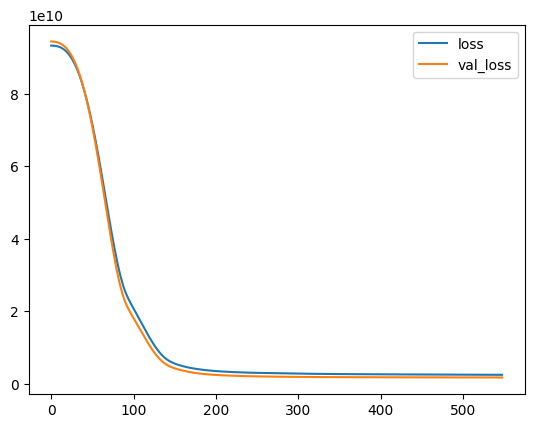

In [ ]:
#loss vs epoch chart: no dropout
loss_df = pd.DataFrame(model_no_dropout.history.history)

loss_df[['loss', 'val_loss']].plot(legend=True)
plt.show()

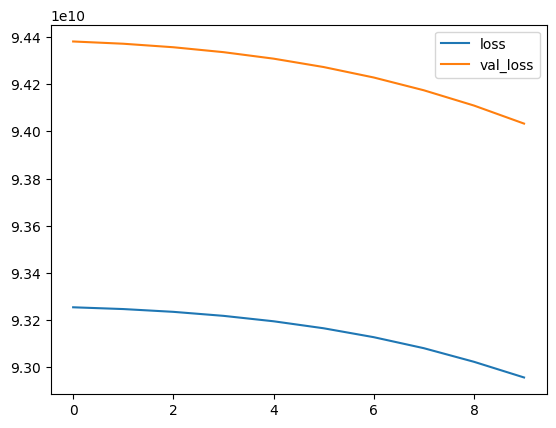

In [ ]:
#loss vs epoch chart: with dropout
loss_df_drop = pd.DataFrame(model_with_dropout.history.history)

loss_df_drop[['loss', 'val_loss']].plot(legend=True)
plt.show()

The model where val_loss is lower than the train loss is the model without dropout. This could be due to a couple of things. It could indicate that our model is underfitting or that there is noise in the data. So that the model isn't fully capturing the actual trends in the data.

# **11.**

In [ ]:
#evaluate model without drop
loss, mae = model_no_dropout.evaluate(x_test, y_test, verbose = 1)

#report loss and mae
print("Loss (MSE):", loss)
print("MAE:", mae)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1520262144.0000 - mae: 25989.8848
Loss (MSE): 1686969856.0
MAE: 27123.818359375


# **12.**

In [ ]:
#get predictions from model without dropout
y_test_pred = model_no_dropout.predict(x_test)

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


# **13.**

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, explained_variance_score, r2_score


In [ ]:
#calculate mape, explained variance, and r2
mape = round(mean_absolute_percentage_error(y_test, y_test_pred),2)
variance = round(explained_variance_score(y_test, y_test_pred),2)
r2 = round(r2_score(y_test, y_test_pred),2)

#report metrics
print("Mean Absolute Percentage Error:", mape)
print("Explained Variance:", variance)
print("R^2:", r2)

Mean Absolute Percentage Error: 0.12
Explained Variance: 0.88
R^2: 0.88


# **14.**

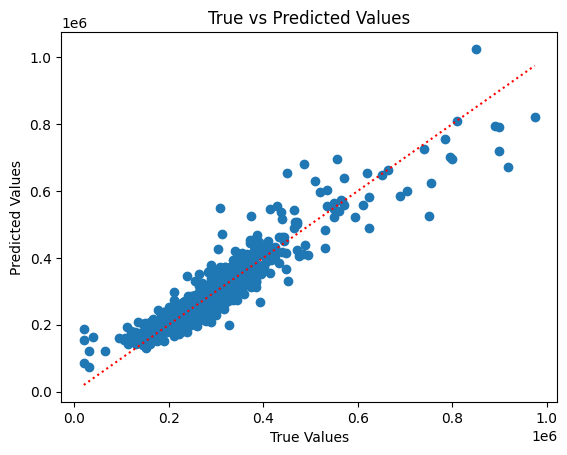

In [ ]:
#create scatter plot for y_true vs y_pred
plt.scatter(y_test, y_test_pred)
plt.title("True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

#represent a perfect regression model (dotted red line)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle=':')

plt.show()

Yes I'm pretty satisfied when looking at the chart. For the model to be perfect, it would follow a 45 degree line (the dotted red line on the chart). Our model doesn't follow that line exactly, but it generally follows the same trend.